#Bootcamp: Analista de Dados com ênfase para o Mercado Financeiro - Desafio Prático!

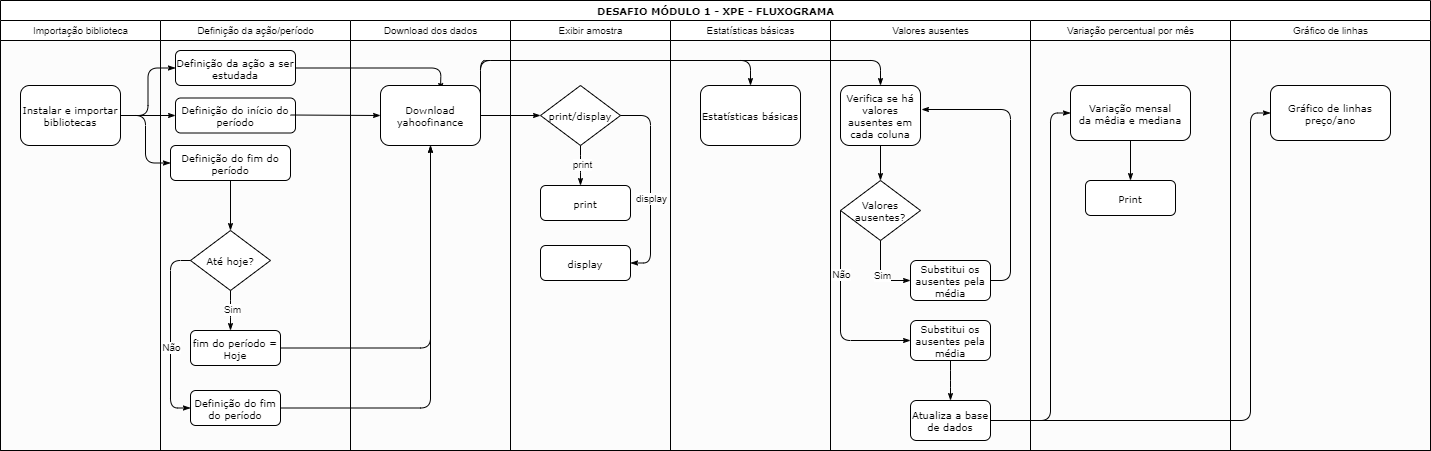

In [110]:
#@title 1. Instalar e importar as bibliotecas necessárias para o projeto.

## O Google Colab já vem com as bibliotecas numpy, pandas e matplotlib instalados. Por isso, os comandos de instalação abaixo estão formatados como texto.

# !pip install numpy --quiet
# !pip install matplotlib --quiet

!pip install yfinance --quiet


import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [90]:
#@title 2. Selecionar interativamente o ativo a ser estudado e o período de análise (início e fim).

# Os componentes da yfinance são (Ativo (Sticker.SA), Start (YYYY-MM-AA), End (YYYY-MM-AA))

print ('Qual ativo será estudado? Exemplo BBDC4.SA')
ativo_estudado = input('Ticker.SA ')

print ("Qual o inicio do período a ser estudado? Exemplo: 2008-01-01")
inicio_periodo =  input('YYYY-MM-DD ')
inicio_periodo = dt.datetime.strptime (inicio_periodo,"%Y-%m-%d")
## fim = dt.datetime.strptime(fim_str, "%Y-%m-%d")

print ('Deseja analisar até a data de hoje?')
fim_periodo = input('S para sim e N para não').upper
if fim_periodo := 'S':
  fim_periodo = dt.datetime.now()
else: fim_periodo = input ('YYYY-MM-DD ')

Qual ativo será estudado? Exemplo BBDC4.SA
Ticker.SA BBDC4.SA
Qual o inicio do período a ser estudado? Exemplo: 2008-01-01
YYYY-MM-DD 2008-01-01
Deseja analisar até a data de hoje?
S para sim e N para nãoS


In [91]:
#@title 3. Fazer o download da base de dados.

df = yf.download (ativo_estudado, start = inicio_periodo, end = fim_periodo)

# df=df.rename(columns = {'Open':'Abertura', 'High':'Máxima', 'Low':'Mínima', 'Close':'Fechamento', 'Adj Close':'Ajuste de fechamento'})



[*********************100%%**********************]  1 of 1 completed


In [92]:
#@title 4. Exibir uma amostra dos dados, podendo o usuário escolher entre Print e Display

# se deseja usar o comando “print” ou “display”.

print ("Como deseja visualizar os dados do ativo selecionado, para PRINT (1) ou para DISPLAY (2)?")
tipo_visualizacao = int(input ("Digite 1 ou 2 "))

while tipo_visualizacao not in [1,2]:
 print ('Opção inválida. Favor digite 1 ou 2.')
 tipo_visualizacao = int(input ("Digite 1 ou 2 "))

if  tipo_visualizacao == 1:
    print ()
    print (df.head())

elif tipo_visualizacao == 2:
    display (df)

else:
    print ('Opção inválida. Favor digite 1 ou 2.')
    tipo_visualizacao = int(input ("Digite 1 ou 2 "))

Como deseja visualizar os dados do ativo selecionado, para PRINT (1) ou para DISPLAY (2)?
Digite 1 ou 2 1

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2008-01-02  23.535587  23.635349  21.989271  22.030840  11.748071        0
2008-01-03  22.113974  22.317656  21.490459  21.577751  11.508541        0
2008-01-04  21.781433  21.968487  21.137135  21.324188  11.373303  5694095
2008-01-07  21.428108  21.993427  21.415638  21.719082  11.583915        0
2008-01-08  22.113974  22.525494  21.931076  22.051622  11.761273        0


In [93]:
#@title 5. Calcular estatísticas básicas

print(df.describe().round(2))

          Open     High      Low    Close  Adj Close        Volume
count  3994.00  3994.00  3994.00  3994.00    3994.00  3.994000e+03
mean     15.96    16.18    15.74    15.96      11.56  2.556290e+07
std       4.76     4.82     4.69     4.75       4.82  3.999884e+07
min       8.01     8.15     7.96     8.00       5.19  0.000000e+00
25%      11.93    12.08    11.76    11.93       7.05  1.269542e+07
50%      14.90    15.10    14.65    14.89      10.41  1.982313e+07
75%      19.25    19.43    18.96    19.21      15.50  3.179683e+07
max      29.75    30.01    29.32    29.61      23.28  1.584432e+09


In [103]:
#@title 6. Identificar e tratar possíveis valores ausentes ou discrepantes no conjunto de dados.

print ('Abaixo seguem dados informativos sobre o ativo no período estudado')
print (df.info())
print ()

for var in df:
  print (f'Valores ausentes na coluna {var}:{np.isnan(df[var]).sum()}')

  if np.isnan(df[var]).sum() > 0:
    df = df[var].fillna(df[var].mean(), inplace=True)






Abaixo seguem dados informativos sobre o ativo no período estudado
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3994 entries, 2008-01-02 to 2024-02-02
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 3994 non-null   float64
 1   High                 3994 non-null   float64
 2   Low                  3994 non-null   float64
 3   Close                3994 non-null   float64
 4   Adj Close            3994 non-null   float64
 5   Volume               3994 non-null   int64  
 6   Variação Percentual  3994 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 249.6 KB
None

Valores ausentes na coluna Open:0
Valores ausentes na coluna High:0
Valores ausentes na coluna Low:0
Valores ausentes na coluna Close:0
Valores ausentes na coluna Adj Close:0
Valores ausentes na coluna Volume:0
Valores ausentes na coluna Variação Percentual:0


In [95]:
#@title 7. Criar uma coluna que represente a variação percentual diária no preço das ações e sumarizando os dados por mês

df['Variação Percentual'] = df['Close'].pct_change() * 100

print("Exibindo a média e a mediana da variação percentual mensal:\n")
sumarizacao_mensal = df.resample('M').agg({'Variação Percentual': ['mean', 'median']})
print(sumarizacao_mensal)

Exibindo a média e a mediana da variação percentual mensal:

           Variação Percentual          
                          mean    median
Date                                    
2008-01-31           -0.593334 -1.021111
2008-02-29            0.668706  0.704487
2008-03-31           -0.355859 -1.192180
2008-04-30            0.795162  0.575581
2008-05-31            0.162953 -0.166680
...                        ...       ...
2023-10-31           -0.095057 -0.282087
2023-11-30            0.771227  0.393644
2023-12-31            0.269172  0.297084
2024-01-31           -0.481655 -0.544265
2024-02-29           -0.097722 -0.097722

[194 rows x 2 columns]


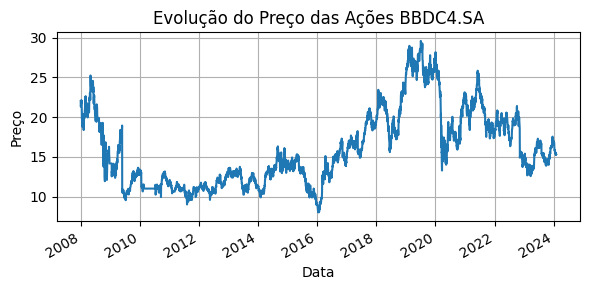

In [96]:
#@title 8. Plotar um gráfico de linha para visualizar a evolução do preço das ações ao longo do tempo


plt.figure(figsize=(6, 3))
df['Close'].plot(title=f'Evolução do Preço das Ações {ativo_estudado}', xlabel='Data', ylabel='Preço')
plt.grid(True)
plt.tight_layout()
plt.show()